In [10]:
import pickle
import seaborn as sns
import pandas as pd

In [11]:
model_pkl = open(r"..\resources\pickled\SVC_author_classifier_neu.pkl", 'rb')
model = pickle.load(model_pkl)
model_pkl.close()

transformer_count_pkl = open(r"..\resources\pickled\count_transformer_neu.pkl", "rb")
count_transformer = pickle.load(transformer_count_pkl)
transformer_count_pkl.close()

transformer_tfidf_pkl = open(r"..\resources\pickled\tfidf_transformer_neu.pkl", "rb")
tfidf_transformer = pickle.load(transformer_tfidf_pkl)
transformer_tfidf_pkl.close()

In [12]:
new_text = r"Freitagmittag kam es auf der Hügelstraße zu einem Unfall zwischen einem Mercedes und einer 11-jährigen Fußgängerin. Das Kind wurde bei dem Zusammenstoß verletzt. Der 61-jährige Mercedes-Fahrer war, gegen 13.00 Uhr, auf der Hügelstraße in Richtung Eschersheimer Landstraße unterwegs. Nachdem er an einer roten Ampel angehalten hatte, fuhr er wieder an, jedoch überquerte in diesem Moment die 11-Jährige die Fahrbahn. Sie trug durch den Zusammenstoß Verletzungen davon und wurde zur Behandlung in ein Krankenhaus eingeliefert. Der 61-Jährige blieb unverletzt und an dem Mercedes entstanden lediglich leichte Beschädigungen. Wie es genau zu dem Unfall kommen konnte, ist Gegenstand der laufenden Ermittlungen."
new_text_transf = tfidf_transformer.transform(count_transformer.transform([new_text]))

In [13]:
probas = model.predict_proba(new_text_transf)[0]

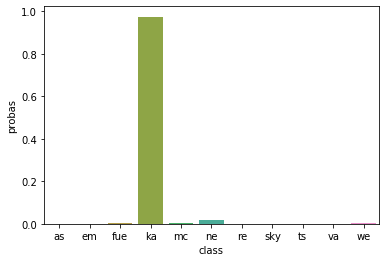

In [14]:
plotdata = pd.DataFrame()
plotdata["class"] = model.classes_
plotdata["probas"] = probas

sns.barplot(x="class", y="probas", data=plotdata)